In [7]:
from bigraph_viz import plot_bigraph
from bigraph_schema import TypeSystem

### Initialize Type System

In [8]:
types = TypeSystem()

## Updates

- state update
- structure update

In [9]:
schemaa = {
    'base': {
        'a': {'_type': 'int'},
    },

    # cannot override existing keys unless it is of a subtype
    'second': {
        'b': {'_type': 'int'},
        '_super': 'base',
    },
}

types.type_registry.register_multiple(schemaa, force=True)

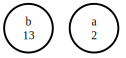

In [13]:
schema = {'_type': 'second'}
state = {
    'b': 13,
    'a': 2,
}
plot_bigraph(state, show_values=True)

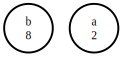

In [14]:
update = {
    'b': -5
}
new_state = types.apply(
    schema,
    state,
    update
)
plot_bigraph(new_state, show_values=True)

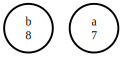

In [15]:
update = {
    'a': 5
}
new_state = types.apply(
    schema,
    new_state,
    update
)
plot_bigraph(new_state, show_values=True)

In [16]:
# from bigraph_schema.registry import apply_registry
from bigraph_viz.dict_utils import deep_merge
def apply_merge(current, update, bindings=None, types=None):
    assert isinstance(state, dict)
    assert isinstance(update, dict)
    updated = deep_merge(state, update)
    return updated
types.apply_registry.register('merge', apply_merge, force=True)

schemab = {
    'merge_branch': {
        '_default': {'a1': 'any'},
        '_apply': 'merge',},
    # cannot override existing keys unless it is of a subtype
    'second': {
        'a1': {'a2': 'any'},
        '_super': 'merge_branch'}}
types.type_registry.register_multiple(schemab, force=True)

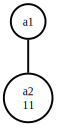

In [17]:
schema = {'_type': 'merge_branch'}
state = {
    'a1': {'a2': 11},
}
plot_bigraph(state, show_values=True)

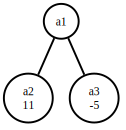

In [18]:
update = {
    'a1': {'a3': -5},
}
new_state = types.apply(
    schema,
    state,
    update
)
# print(pf(new_state))
plot_bigraph(new_state, show_values=True)